In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nbimporter
import vapour_pressure as vp

Importing Jupyter notebook from vapour_pressure.ipynb


# 水分状態を換算するモジュール

## 換算式

#### 記号

$T$ : Absolute temperature / 絶対温度, K  
$R_v$ : 水蒸気の気体定数, J kg<sup>-1</sup> K<sup>-1</sup>  
$RH$ : 相対湿度 ( 0.0 ～ 1.0 )  
$P_v$ : 水蒸気圧, Pa  
$P_{vs}$ : 飽和水蒸気圧, Pa  
$\mu$ : 水分化学ポテンシャル, J kg<sup>-1</sup> 

$ \displaystyle R_v = \frac{8316.0}{18.016}$

In [2]:
def Rv():
    return 8316.0/18.016

#### RH（相対湿度） - Pv（水蒸気圧）関係  

$ \displaystyle P_v = RH \cdot P_{vs}$

In [3]:
def convertRH2Pv( temp, rh ):
    return rh * vp.Pvs( temp )

In [4]:
def convertPv2RH( temp, pv ):
    return pv / vp.Pvs( temp )

#### RH（相対湿度） - Miu（水分化学ポテンシャル）関係  

$ \displaystyle \mu = R_v \cdot T \cdot \log(RH)$

In [5]:
def convertRH2Miu( temp, rh ):
    return Rv() * temp * np.log( rh )

In [6]:
def convertMiu2RH( temp, miu ):
    return np.exp( miu / Rv() / temp )

#### Pv（水蒸気圧） - Miu（水分化学ポテンシャル）関係  

In [7]:
def convertPv2Miu( temp, pv ):
    rh = convertPv2RH( temp, pv )
    return convertRH2Miur( temp, rh )

In [8]:
def convertMiu2Pv( temp, miu ):
    rh = convertMiu2RH( temp, miu )
    return convertRH2Pv( temp, rh )

## Example

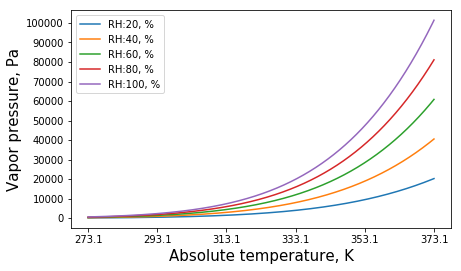

In [9]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)

xs = [ n * 0.01 for n in range(27315,37315) ]

for RH in [ 0.2, 0.4, 0.6, 0.8, 1.0 ]:
    ys = [ convertRH2Pv( x, RH ) for x in xs ]
    ax.plot( xs, ys, label = 'RH:' + str(int(RH*100)) + ', %' )

ax.set_xticks([ n * 20 + 273.15 for n in range(0, 6) ])
ax.set_yticks([ n * 10000 for n in range(0, 11) ])
ax.set_xlabel('Absolute temperature, K', fontsize = 15 )
ax.set_ylabel('Vapor pressure, Pa', fontsize = 15 )
plt.legend()
plt.show()

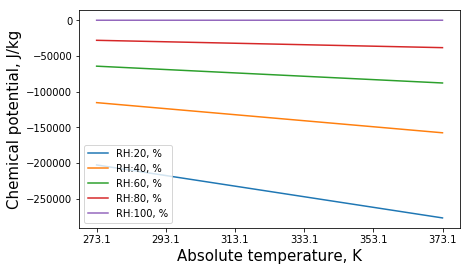

In [10]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)

xs = [ n * 0.01 for n in range(27315,37315) ]

for RH in [ 0.2, 0.4, 0.6, 0.8, 1.0 ]:
    ys = [ convertRH2Miu( x, RH ) for x in xs ]
    ax.plot( xs, ys, label = 'RH:' + str(int(RH*100)) + ', %' )

ax.set_xticks([ n * 20 + 273.15 for n in range(0, 6) ])
# ax.set_yticks([ n * 10000 for n in range(0, 11) ])
ax.set_xlabel('Absolute temperature, K', fontsize = 15 )
ax.set_ylabel('Chemical potential, J/kg', fontsize = 15 )
plt.legend()
plt.show()